In [ ]:
!pip install dwave_networkx

Proposed Methodology

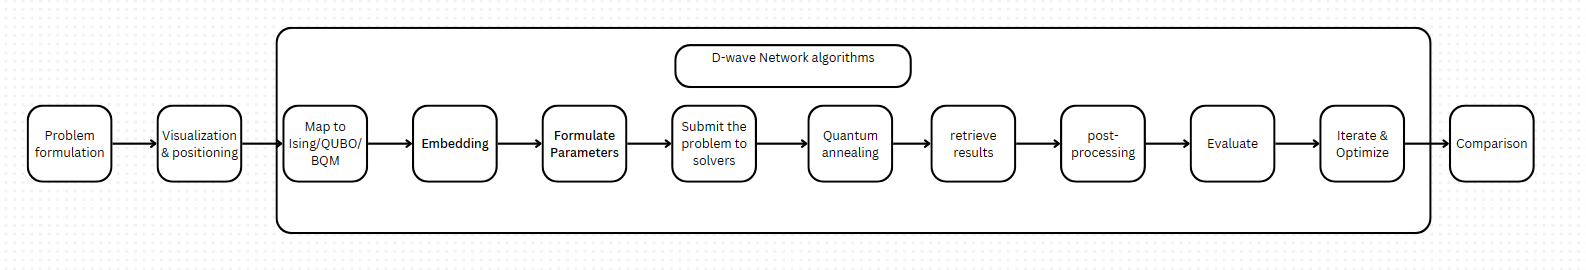

In [ ]:
# Install necessary libraries
!pip install dwave-ocean-sdk minorminer networkx

In [ ]:
import os

In [ ]:

import itertools

from collections import defaultdict

from dwave_networkx.utils import binary_quadratic_model_sampler

In [ ]:
from dwave_networkx.algorithms.tsp import *

In [ ]:
# Import required libraries
import networkx as nx
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from dimod import ExactSolver, BinaryQuadraticModel

In [ ]:
import numpy as np
import networkx as nx
import dimod
import dwave_networkx as dnx

In [ ]:
import pandas as pd

In [ ]:
data = """0.0  3.0  4.0  2.0  7.0
3.0  0.0  4.0  6.0  3.0
4.0  4.0  0.0  5.0  8.0
2.0  6.0  5.0  0.0  6.0
7.0  3.0  8.0  6.0  0.0"""



# Specify the file path
file_path = "/content/matrix.txt"

# Write the data to a text file
with open(file_path, "w") as file:
    file.write(data)

print(f"File '{file_path}' created successfully.")


File '/content/matrix.txt' created successfully.


In [ ]:
data

'0.0  3.0  4.0  2.0  7.0\n3.0  0.0  4.0  6.0  3.0\n4.0  4.0  0.0  5.0  8.0\n2.0  6.0  5.0  0.0  6.0\n7.0  3.0  8.0  6.0  0.0'

In [ ]:
data= pd.read_csv("matrix.txt", sep='\s+', header=None)

In [ ]:
data

,0,1,2,3,4
0,0.0,3.0,4.0,2.0,7.0
1,3.0,0.0,4.0,6.0,3.0
2,4.0,4.0,0.0,5.0,8.0
3,2.0,6.0,5.0,0.0,6.0
4,7.0,3.0,8.0,6.0,0.0


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
idx_city1= 0;
idx_city2=1
distance= data[idx_city1][idx_city2]
print("dist btw city {} & city {} is {} ." .format(idx_city1, idx_city2, distance))

dist btw city 0 & city 1 is 3.0 .


In [ ]:
num_cities = data.shape[0]

In [ ]:
num_cities

5

In [ ]:
seed=1
np.random.seed(seed)

In [ ]:
G=nx.from_pandas_adjacency(data)
pos=nx.spring_layout(G, seed=seed)

In [ ]:
nodes=G.nodes()
edges= G.edges()
weights= nx.get_edge_attributes(G, 'weight');

In [ ]:
print("weights of graph", weights)

weights of graph {(0, 1): 3.0, (0, 2): 4.0, (0, 3): 2.0, (0, 4): 7.0, (1, 2): 4.0, (1, 3): 6.0, (1, 4): 3.0, (2, 3): 5.0, (2, 4): 8.0, (3, 4): 6.0}


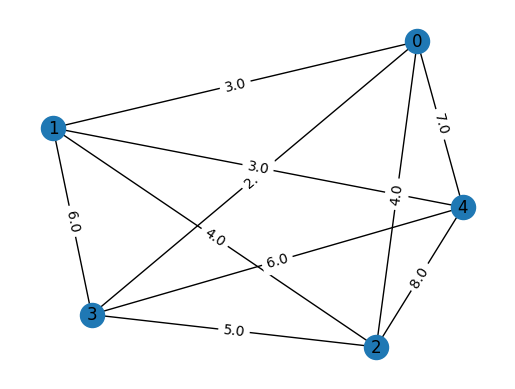

In [ ]:
plt.axis('off');
nx.draw_networkx(G, pos, with_labels=True);
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights);

In [ ]:
from __future__ import division

In [ ]:

from dwave_networkx.utils import binary_quadratic_model_sampler

__all__ = ["traveling_salesperson",
           "traveling_salesperson_qubo",
           "traveling_salesman",
           "traveling_salesman_qubo",
           "is_hamiltonian_path",
           ]


In [ ]:
#use(classical) simulated annealing
%time route = dnx.traveling_salesperson(G, dimod.SimulatedAnnealingSampler(), start=0)
print("Route found with simulated annealing:", route)

CPU times: user 3.91 s, sys: 15 ms, total: 3.92 s
Wall time: 4.97 s
Route found with simulated annealing: [0, 3, 4, 1, 2]


In [ ]:

import time

# get the start time
st = time.time()
#use(classical) simulated annealing
%time route = dnx.traveling_salesperson(G, dimod.SimulatedAnnealingSampler(), start=0)
print("Route found with simulated annealing:", route)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


CPU times: user 3.78 s, sys: 13.4 ms, total: 3.8 s
Wall time: 3.95 s
Route found with simulated annealing: [0, 3, 2, 4, 1]
Execution time: 3.94789981842041 seconds


In [ ]:

import time

# get the start time
st = time.process_time()
#use(classical) simulated annealing
%time route = dnx.traveling_salesperson(G, dimod.SimulatedAnnealingSampler(), start=0)
print("Route found with simulated annealing:", route)

et = time.process_time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


CPU times: user 5 s, sys: 16 ms, total: 5.01 s
Wall time: 5.88 s
Route found with simulated annealing: [0, 2, 1, 4, 3]
Execution time: 5.014955088000079 seconds


In [ ]:
%timeit route = dnx.traveling_salesperson(G, dimod.SimulatedAnnealingSampler(), start=0)
print("Route found with simulated annealing:", route)

4.05 s ± 718 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Route found with simulated annealing: [0, 2, 1, 4, 3]


In [ ]:
%time exact_route = dnx.traveling_salesperson(G, dimod.ExactSolver(), start=0)
print("Route found with exact solver(brute force)", exact_route)

CPU times: user 1min 36s, sys: 2.11 s, total: 1min 38s
Wall time: 2min 3s
Route found with exact solver(brute force) [0, 3, 4, 1, 2]


In [ ]:
total_dist=0
for idx, node in enumerate(route[:-1]):
  dist=data[route[idx+1]][route[idx]]
  total_dist +=dist


In [ ]:
print("Total distance (Without return):" , total_dist)

Total distance (Without return): 15.0


In [ ]:
return_distance= data[route[0]][route[-1]]
print("Distance between start and end", return_distance)

Distance between start and end 4.0


In [ ]:
distance= total_dist+ return_distance
print("total including return:", distance)

total including return: 19.0


In [ ]:
total_dist=0
for idx, node in enumerate(exact_route[:-1]):
  dist=data[exact_route[idx+1]][exact_route[idx]]
  total_dist +=dist


In [ ]:
print("Total distance exact_route (Without return):" , total_dist)

Total distance exact_route (Without return): 15.0


In [ ]:
return_distance= data[exact_route[0]][exact_route[-1]]
print("Distance between exact_route start and end", return_distance)

Distance between start and end 4.0


In [ ]:
distance= total_dist+ return_distance
print("total including return: exact_route", distance)

total including return: 19.0


In [ ]:
from dwave.cloud.client import Client

In [ ]:
#token value was here (personal)
client = Client(token=token)
print(client.get_solvers())

[BQMSolver(id='hybrid_binary_quadratic_model_version2'), DQMSolver(id='hybrid_discrete_quadratic_model_version1'), CQMSolver(id='hybrid_constrained_quadratic_model_version1'), StructuredSolver(id='Advantage2_prototype1.1'), StructuredSolver(id='Advantage_system6.3'), StructuredSolver(id='Advantage_system4.1')]


In [ ]:
%time embedded_route = dnx.traveling_salesperson(G, EmbeddingComposite(DWaveSampler(token=token)), start=0)
print("route with Dwave annealer:", embedded_route)

CPU times: user 4.84 s, sys: 86.6 ms, total: 4.92 s
Wall time: 7.53 s
route with Dwave annealer: [0, 3, 2, 1, 4]


Solving optimization problems on quantum annealers usually requires
each variable of the problem to be represented by a connected set of qubits called a
logical qubit or a chain. Chain weights, in the form of ferromagnetic coupling between
the chain qubits, are applied so that the physical qubits in a chain favor taking the same
value in low energy samples. Assigning a good chain-strength value is crucial for the
ability of quantum annealing to solve hard problems, but there are no general methods
for computing such a value and, even if an optimal value is found, it may still not be
suitable by being too large for accurate annealing results

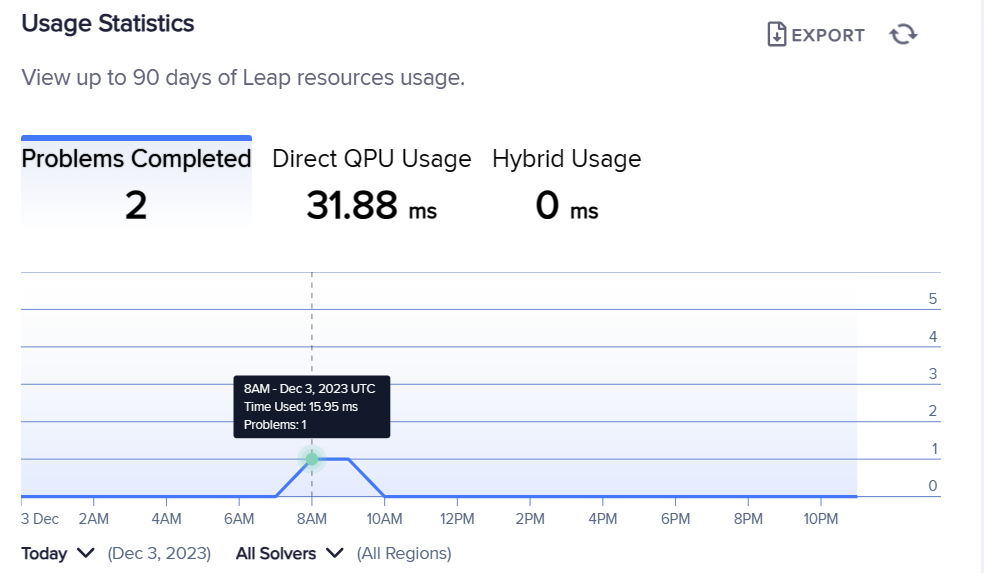

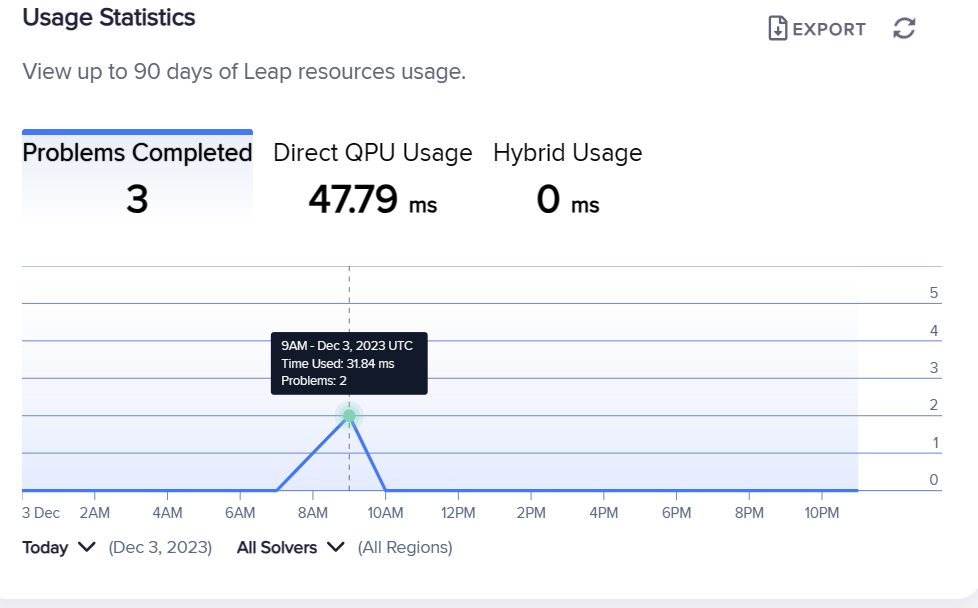

In [ ]:
%time embedded_route2 = dnx.traveling_salesperson(G, EmbeddingComposite(DWaveSampler(token=token)), start=0)
print("route with Dwave annealer:", embedded_route2)

CPU times: user 5.11 s, sys: 80.2 ms, total: 5.19 s
Wall time: 11.2 s
route with Dwave annealer: [0, 1, 4, 2, 3]


In [ ]:
total_dist=0
for idx, node in enumerate(embedded_route[:-1]):
  dist=data[embedded_route[idx+1]][embedded_route[idx]]
  total_dist +=dist


In [ ]:
print("Total distance exact_route (Without return):" , total_dist)

Total distance exact_route (Without return): 14.0


In [ ]:
return_distance= data[embedded_route[0]][embedded_route[-1]]
print("Distance between exact_route start and end", return_distance)

Distance between exact_route start and end 7.0


In [ ]:
distance= total_dist+ return_distance
print("total including return: exact_route", distance)

total including return: exact_route 21.0


In [ ]:
total_dist=0
for idx, node in enumerate(embedded_route2[:-1]):
  dist=data[embedded_route[idx+1]][embedded_route2[idx]]
  total_dist +=dist
print("Total distance exact_route (Without return):" , total_dist)
return_distance= data[embedded_route2[0]][embedded_route2[-1]]
print("Distance between exact_route start and end", return_distance)
distance= total_dist+ return_distance
print("total including return: exact_route", distance)

Total distance exact_route (Without return): 17.0
Distance between exact_route start and end 2.0
total including return: exact_route 19.0


In [ ]:

%time embedded_big_route_reads = dnx.traveling_salesperson(G,  EmbeddingComposite(DWaveSampler(token=token)), num_reads=1000, start=0)
print("Route found with simulated annealing:", embedded_big_route_reads)

CPU times: user 3.61 s, sys: 54.9 ms, total: 3.67 s
Wall time: 5.6 s
Route found with simulated annealing: [0, 3, 4, 1, 2]


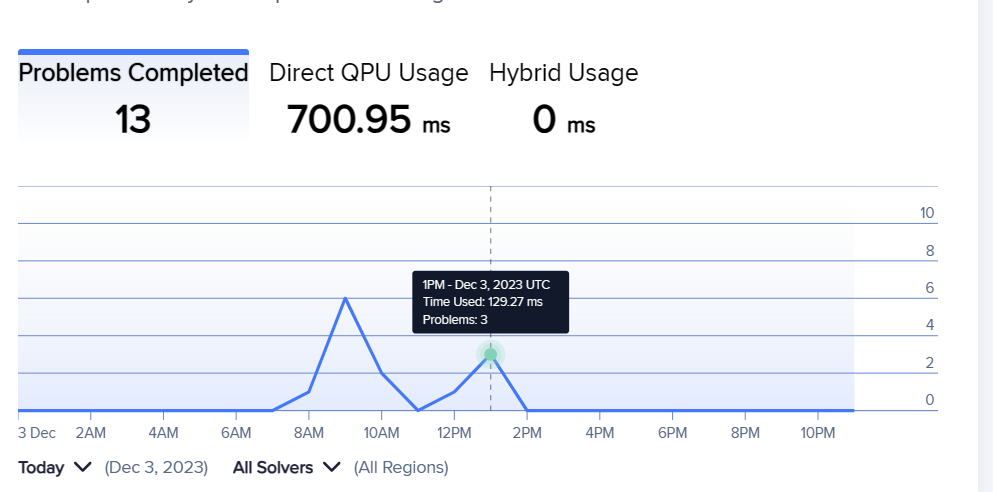

In [ ]:
lagrange=24

In [ ]:
lagrange_list= list(np.arange(int(0.8*lagrange), int(1.1*lagrange)))


In [ ]:
print('lagrange parameter for hpo:' , lagrange_list)

lagrange parameter for hpo: [19, 20, 21, 22, 23, 24, 25]


In [ ]:
lagrange=None
weight='weight'

N= G.number_of_nodes()
if lagrange is None:
  if G.number_of_edges()>0:
    lagrange= G.size(weight=weight)*G.number_of_nodes()/G.number_of_edges()
  else:
    lagrange=2

print("def lagrange para", lagrange)

def lagrange para 24.0


G.size(weight=weight): This part calculates the sum of the edge weights in the graph. The weight parameter is used to consider the weights assigned to the edges. If all edge weights are equal, it's equivalent to counting the number of edges.

G.number_of_nodes(): This part calculates the number of nodes in the graph.

G.number_of_edges(): This part calculates the number of edges in the graph.

The formula essentially represents the ratio of the total edge weight to the number of edges in the graph, normalized by the number of nodes. The rationale behind this is to create a Lagrange parameter that is proportional to the density of the graph's edges and the total cost.

In optimization problems, the Lagrange parameter is often used to introduce penalty terms into the objective function that encourage or enforce certain constraints. In the case of TSP, the Lagrange parameter is typically associated with the constraints that ensure each city is visited exactly once in the tour.
 The Lagrange
multiplier acts as a weight given to the constraint. It should be
set high enough to ensure the constraint is satisfied, but
setting it too high obscures the real function we are trying
to minimize.

High Density: In a graph with many edges, there are numerous potential routes between cities, making it easier to find feasible solutions to the TSP. A higher Lagrange parameter can be used to emphasize the importance of satisfying constraints, as there are more possible routes to consider.

Low Density: In a sparser graph, there are fewer edges, and finding feasible solutions becomes more challenging. A lower Lagrange parameter may be used to reduce the emphasis on satisfying constraints, allowing for more flexibility in optimizing the objective function.

In [ ]:
qubo = dnx.traveling_salesman_qubo(G, lagrange)
qubo

defaultdict(float,
            {((0, 0), (0, 0)): -48.0,
             ((0, 0), (0, 1)): 48.0,
             ((0, 0), (0, 2)): 48.0,
             ((0, 0), (0, 3)): 48.0,
             ((0, 0), (0, 4)): 48.0,
             ((0, 1), (0, 1)): -48.0,
             ((0, 1), (0, 2)): 48.0,
             ((0, 1), (0, 3)): 48.0,
             ((0, 1), (0, 4)): 48.0,
             ((0, 2), (0, 2)): -48.0,
             ((0, 2), (0, 3)): 48.0,
             ((0, 2), (0, 4)): 48.0,
             ((0, 3), (0, 3)): -48.0,
             ((0, 3), (0, 4)): 48.0,
             ((0, 4), (0, 4)): -48.0,
             ((1, 0), (1, 0)): -48.0,
             ((1, 0), (1, 1)): 48.0,
             ((1, 0), (1, 2)): 48.0,
             ((1, 0), (1, 3)): 48.0,
             ((1, 0), (1, 4)): 48.0,
             ((1, 1), (1, 1)): -48.0,
             ((1, 1), (1, 2)): 48.0,
             ((1, 1), (1, 3)): 48.0,
             ((1, 1), (1, 4)): 48.0,
             ((1, 2), (1, 2)): -48.0,
             ((1, 2), (1, 3)): 48.0,
           

In [ ]:
sampler = EmbeddingComposite(DWaveSampler(token=token))

In [ ]:
response= sampler.sample_qubo(qubo)
sample= response.first.sample

In [ ]:
response

SampleSet(rec.array([([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], -170., 1, 0.)],
          dtype=[('sample', 'i1', (25,)), ('energy', '<f8'), ('num_occurrences', '<i8'), ('chain_break_fraction', '<f8')]), Variables([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]), {'timing': {'qpu_sampling_time': 97.04, 'qpu_anneal_time_per_sample': 20.0, 'qpu_readout_time_per_sample': 56.5, 'qpu_access_time': 15878.61, 'qpu_access_overhead_time': 214651.39, 'qpu_programming_time': 15781.57, 'qpu_delay_time_per_sample': 20.54, 'total_post_processing_time': 98.0, 'post_processing_overhead_time': 98.0}, 'problem_id': '0cb08278-2ccf-4a61-9d7f-382c96d0deb4'}, 'BINARY')

image source:https://docs.dwavesys.com/docs/latest/c_qpu_timing.html#:~:text=The%20total%20time%20for%20a%20QMI%20to%20pass,is%20known%20as%20the%20QMI%E2%80%99s%20QPU%20access%20time.


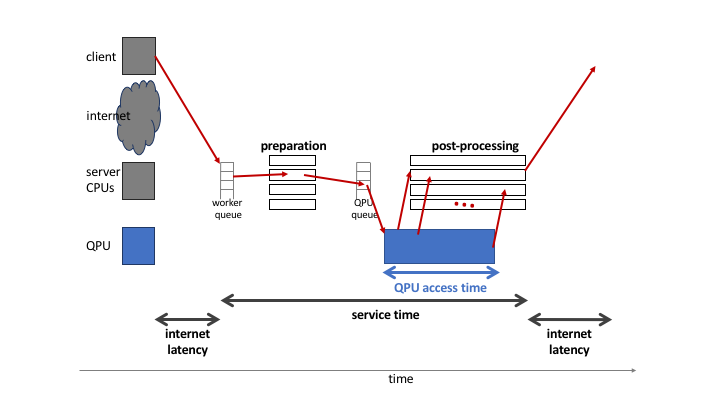

In [ ]:
response.info

{'timing': {'qpu_sampling_time': 97.04,
  'qpu_anneal_time_per_sample': 20.0,
  'qpu_readout_time_per_sample': 56.5,
  'qpu_access_time': 15878.61,
  'qpu_access_overhead_time': 214651.39,
  'qpu_programming_time': 15781.57,
  'qpu_delay_time_per_sample': 20.54,
  'total_post_processing_time': 98.0,
  'post_processing_overhead_time': 98.0},
 'problem_id': '0cb08278-2ccf-4a61-9d7f-382c96d0deb4'}

In [ ]:
sample

{(0, 0): 1,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (0, 4): 0,
 (1, 0): 0,
 (1, 1): 0,
 (1, 2): 0,
 (1, 3): 0,
 (1, 4): 0,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 1,
 (2, 3): 1,
 (2, 4): 0,
 (3, 0): 0,
 (3, 1): 1,
 (3, 2): 0,
 (3, 3): 0,
 (3, 4): 0,
 (4, 0): 0,
 (4, 1): 0,
 (4, 2): 0,
 (4, 3): 0,
 (4, 4): 1}

In [ ]:
route= [None]*len(G)

In [ ]:
for (city, time), val in sample.items():
  if val:
      route[time] =city

In [ ]:
route

[0, 3, 2, 2, 4]

In [ ]:
start=0

In [ ]:
if start is not None and route[0] != start:
  idx= route.index(start)
  route= route[idx:]+ route[:idx]

In [ ]:
route

[0, 3, 2, 2, 4]

In [ ]:
data = """
0,29,82,46,68,52,72,42,51,55
29,0,55,46,42,43,43,23,23,31
82,55,0,68,46,55,23,43,41,29
46,46,68,0,82,15,72,31,62,42
68,42,46,82,0,74,23,52,21,46
52,43,55,15,74,0,61,23,55,31
72,43,23,72,23,61,0,42,23,31
42,23,43,31,52,23,42,0,33,15
51,23,41,62,21,55,23,33,0,29
55,31,29,42,46,31,31,15,29,0"""

# Specify the file path
file_path = "/content/data.txt"

# Write the data to a text file
with open(file_path, "w") as file:
    file.write(data)

print(f"File '{file_path}' created successfully.")


File '/content/data.txt' created successfully.


In [ ]:
data10 = pd.read_csv("data.txt", header=None)

In [ ]:
data10

,0,1,2,3,4,5,6,7,8,9
0,0,29,82,46,68,52,72,42,51,55
1,29,0,55,46,42,43,43,23,23,31
2,82,55,0,68,46,55,23,43,41,29
3,46,46,68,0,82,15,72,31,62,42
4,68,42,46,82,0,74,23,52,21,46
5,52,43,55,15,74,0,61,23,55,31
6,72,43,23,72,23,61,0,42,23,31
7,42,23,43,31,52,23,42,0,33,15
8,51,23,41,62,21,55,23,33,0,29
9,55,31,29,42,46,31,31,15,29,0


{(0, 1): Text(-0.7387424363311498, 0.2488539576236942, '29'),
 (0, 2): Text(0.14490952584904576, -0.527559199770597, '82'),
 (0, 3): Text(0.5022171652927911, 0.12064804590954531, '46'),
 (0, 4): Text(0.06624576541151188, 0.16589837669280996, '68'),
 (0, 5): Text(-0.7577712815717101, -0.33405713040594315, '52'),
 (0, 6): Text(-0.3191167847997729, 0.5695944392976111, '72'),
 (0, 7): Text(0.6785939980575042, -0.4045652888477901, '42'),
 (0, 8): Text(-0.2236059848565537, -0.7915985869979357, '51'),
 (0, 9): Text(0.21883402129335905, 0.6878819818437703, '55'),
 (1, 2): Text(-0.006129950338009754, -0.3857404573060683, '55'),
 (1, 3): Text(0.35117768910573566, 0.2624667883740739, '46'),
 (1, 4): Text(-0.08479371077554362, 0.30771711915733857, '42'),
 (1, 5): Text(-0.9088107577587656, -0.19223838794141457, '43'),
 (1, 6): Text(-0.4701562609868284, 0.7114131817621397, '43'),
 (1, 7): Text(0.5275545218704487, -0.2627465463832615, '23'),
 (1, 8): Text(-0.3746454610436092, -0.6497798445334071, '23

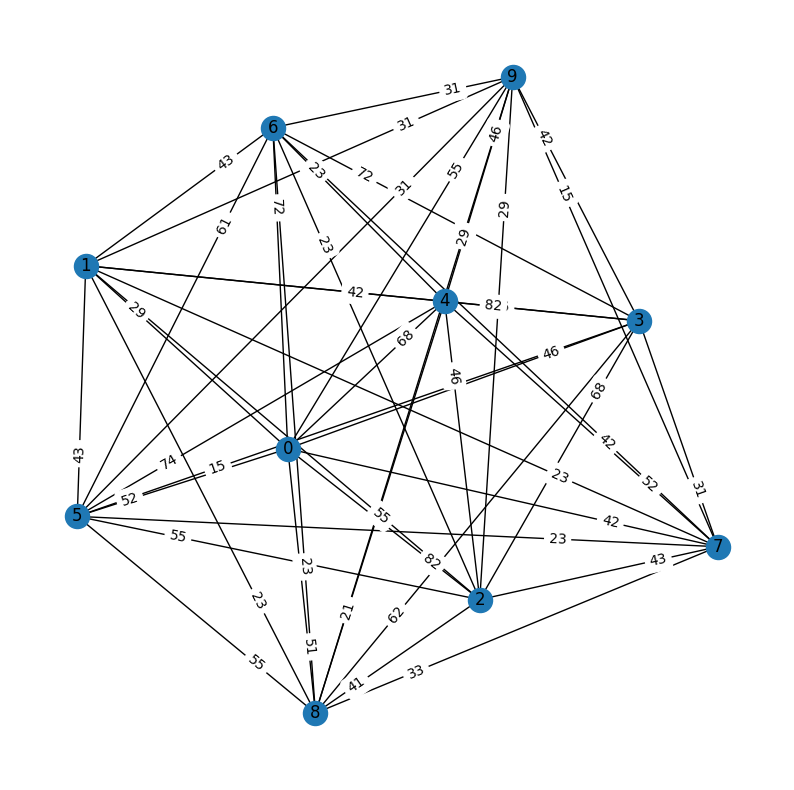

In [ ]:
G=nx.from_pandas_adjacency(data10)
pos=nx.spring_layout(G, seed=seed)
nodes=G.nodes()
edges= G.edges()
weights= nx.get_edge_attributes(G, 'weight');

plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, label_pos =0.25)

In [ ]:
#use(classical) simulated annealing
%time route = dnx.traveling_salesperson(G, dimod.SimulatedAnnealingSampler(), start=0)
print("Route found with simulated annealing:", route)

CPU times: user 36.1 s, sys: 104 ms, total: 36.2 s
Wall time: 43.5 s
Route found with simulated annealing: [0, 7, 6, 9, 1, 5, 3, 8, 2, 4]


In [ ]:
total_dist=0
for idx, node in enumerate(route[:-1]):
  dist =data10[route[idx+1]][route[idx]]
  total_dist += dist
print("Total distance exact_route (Without return):" , total_dist)
return_distance= data10[route[0]][route[-1]]
print("Distance between exact_route start and end", return_distance)
distance= total_dist+ return_distance
print("total including return: exact_route", distance)

Total distance exact_route (Without return): 353
Distance between exact_route start and end 68
total including return: exact_route 421


In [ ]:
#use(classical) simulated annealing
%time exact_route = dnx.traveling_salesperson(G, dimod.ExactSolver(), start=0)
print("Route found with simulated annealing:", exact_route)

ValueError: ignored

Route found with simulated annealing: [0, 3, 4, 1, 2]


In [ ]:

%time embedded_big_route = dnx.traveling_salesperson(G,  EmbeddingComposite(DWaveSampler(token=token)), num_reads=1000, start=0)
print("Route found with simulated annealing:", embedded_big_route)

CPU times: user 1min 29s, sys: 742 ms, total: 1min 29s
Wall time: 1min 46s
Route found with simulated annealing: [0, 8, 7, 5, 6, 9, 2, 1, 4, None]


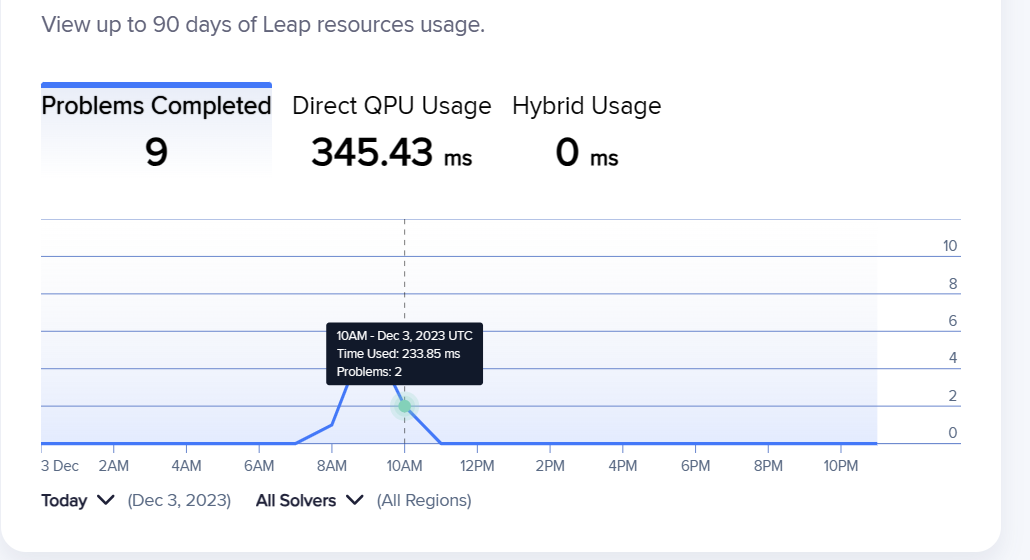

In [ ]:
embedded_big_route= [0, 8, 7, 5, 6, 9, 2, 1, 4]

In [ ]:
total_dist=0
for idx, node in enumerate(embedded_big_route[:-1]):
  dist =data10[embedded_big_route[idx+1]][embedded_big_route[idx]]
  total_dist += dist
print("Total distance exact_route (Without return):" , total_dist)
return_distance= data10[embedded_big_route[0]][embedded_big_route[-1]]
print("Distance between exact_route start and end", return_distance)
distance= total_dist+ return_distance
print("total including return: exact_route", distance)

Total distance exact_route (Without return): 325
Distance between exact_route start and end 68
total including return: exact_route 393


In [ ]:

%time embedded_big_route = dnx.traveling_salesperson(G,  EmbeddingComposite(DWaveSampler(token=token)), num_reads=1000, start=0)
print("Route found with simulated annealing:", embedded_big_route)

CPU times: user 1min 15s, sys: 525 ms, total: 1min 16s
Wall time: 1min 20s
Route found with simulated annealing: [0, 7, 2, 3, 9, 6, 8, 4, 1, 5]


In [ ]:
total_dist=0
for idx, node in enumerate(embedded_big_route[:-1]):
  dist =data10[embedded_big_route[idx+1]][embedded_big_route[idx]]
  total_dist += dist
print("Total distance exact_route (Without return):" , total_dist)
return_distance= data10[embedded_big_route[0]][embedded_big_route[-1]]
print("Distance between exact_route start and end", return_distance)
distance= total_dist+ return_distance
print("total including return: exact_route", distance)

Total distance exact_route (Without return): 355
Distance between exact_route start and end 52
total including return: exact_route 407


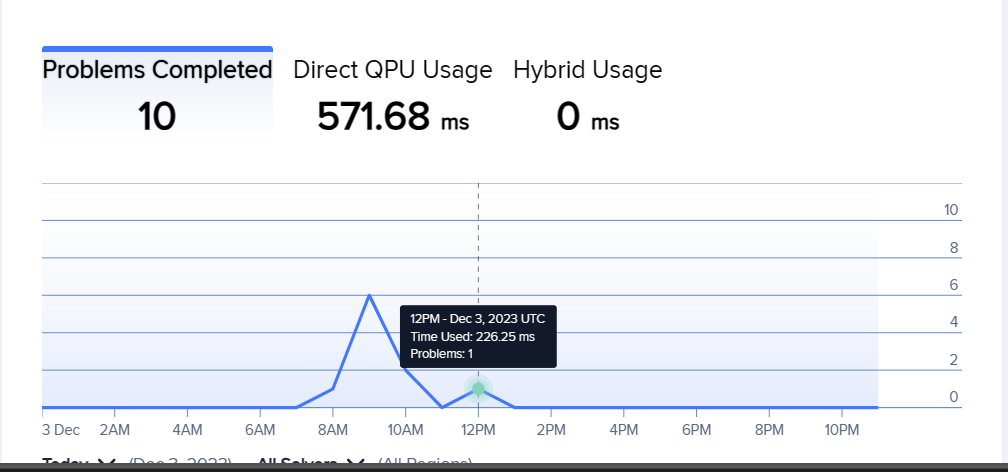

In [ ]:

%time embedded_big_route = dnx.traveling_salesperson(G,  EmbeddingComposite(DWaveSampler(token=token)), start=0)
print("Route found with simulated annealing:", embedded_big_route)

CPU times: user 1min 36s, sys: 727 ms, total: 1min 36s
Wall time: 1min 46s
Route found with simulated annealing: [0, 7, 9, 5, 1, None, None, 7, 4, 9]


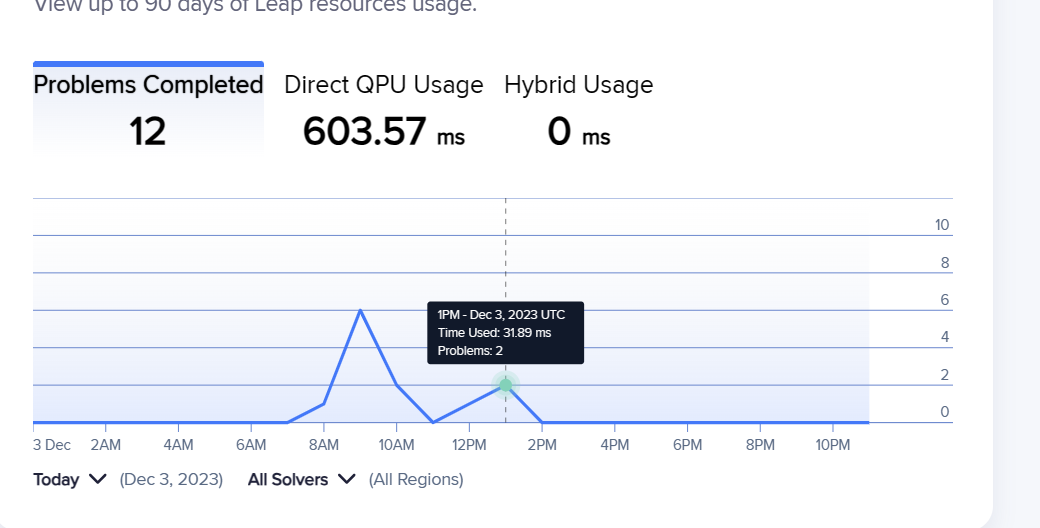

In [ ]:
export= pd.read_csv("export (2).csv")

In [ ]:
export

,solver_name,date,hour,total_time_used_ms,completed_problems
0,Advantage_system4.1,2023-12-03,8,15.950,1
1,Advantage_system4.1,2023-12-03,9,95.626,6
2,Advantage_system4.1,2023-12-03,10,15.992,1


In [ ]:
from prettytable import PrettyTable

# Data
cities = [5, 8]
simulated_annealing = ["4.97s", "36.2s"]
exact_solver = ["1m 38s", "None"]
DWaveSampler = ["31.88ms | 3.67 s/ 5.45 s", "31.89ms | 1 min 36s"]
DWaveSamplernumreads = ["129.27ms", "226.25ms"]

# Create a table
table = PrettyTable()
table.field_names = ["Number of Cities", "Simulated Annealing", "Exact Solver", "D-Wave Sampler (QPU DIRECT USAGE | CPU)", "D-Wave Sampler (num_reads=1000)(QPU DIRECT USAGE)"]

# Add data to the table
for i in range(len(cities)):
    table.add_row([cities[i], simulated_annealing[i], exact_solver[i], DWaveSampler[i], DWaveSamplernumreads[i]])

# Print the table
print(table)


+------------------+---------------------+--------------+-----------------------------------------+---------------------------------------------------+
| Number of Cities | Simulated Annealing | Exact Solver | D-Wave Sampler (QPU DIRECT USAGE | CPU) | D-Wave Sampler (num_reads=1000)(QPU DIRECT USAGE) |
+------------------+---------------------+--------------+-----------------------------------------+---------------------------------------------------+
|        5         |        4.97s        |    1m 38s    |         31.88ms | 3.67 s/ 5.45 s        |                      129.27ms                     |
|        8         |        36.2s        |     None     |           31.89ms | 1 min 36s           |                      226.25ms                     |
+------------------+---------------------+--------------+-----------------------------------------+---------------------------------------------------+


In [ ]:
import dwave.inspector